##Project description

**Background:** Gene expression can be approximated by measuring the level of mRNA, where higher mRNA levels are typically indicative of higher gene expression. mRNA levels can be measured by RNA sequencing (or more specifically, see 8:10-10:10 [cDNA](https://https://www.youtube.com/watch?v=-kTcFZxP6kM&t=663s)) by [short-read sequencing](https://www.youtube.com/watch?v=fCd6B5HRaZ8&t=243s), which can reveal how highly each gene is expressed relative to other genes in an organism. 

Since proteins that work together in e.g., protein complex, need to be all present in correct abundances to form a functioning complex, mRNA levels of interacting proteins tend to be [correlated](https://en.wikipedia.org/wiki/Correlation_and_dependence), i.e., expressed in the same ratios throughout the life of an organism. Genes whose mRNAs are correlated are [co-expressed](https://en.wikipedia.org/wiki/Gene_co-expression_network). Co-expression analysis is thus a powerful method to identify functionally related genes.

The overarching aim of this project is to identify novel photosynthetic genes in your assigned organism. To do this, you will use gene expression data to perform a co-expression analysis and identify novel components of the photosynthesis complex. These genes can then be further studied by others to improve photosynthesis, and increase crop yield.

**Do not import any other modules and packages, than the ones already specified by Marek. Yes, other modules can simplify some of the tasks, but your job is to demonstrate that you can use very basic Python to solve these challenges.**


*To those of you interested in bioinformatics, we will also offer an internship in Marek's lab at the end of the course.*



**Group 26 Group members**

Goh Dai Yi  (U2240892J)

Jess Tan  (U2240981F)

Joey Loh Yee Ting  (U2240001E)

Sim Swee Song  (U2240425H)

Wong Li Lynn, Sheryl  (U2240281E)


# Week 9 - Annotating RNA-sequencing data

Your group is given a zip file containing two files:

* _runtable contains the annotations of the RNA-seq samples used in your expression matrix
* The other file contains the actual expression matrix (i.e., a table of numbers). The rows represent genes, while the columns represent RNA-seq samples

**Prerequisites:** None

**Tasks:** This week's task is:
* Annotate all samples within the _runtable file

Load the runtable file into excel as a comma-separated file (google the way to do this). You will most likely see something like this:

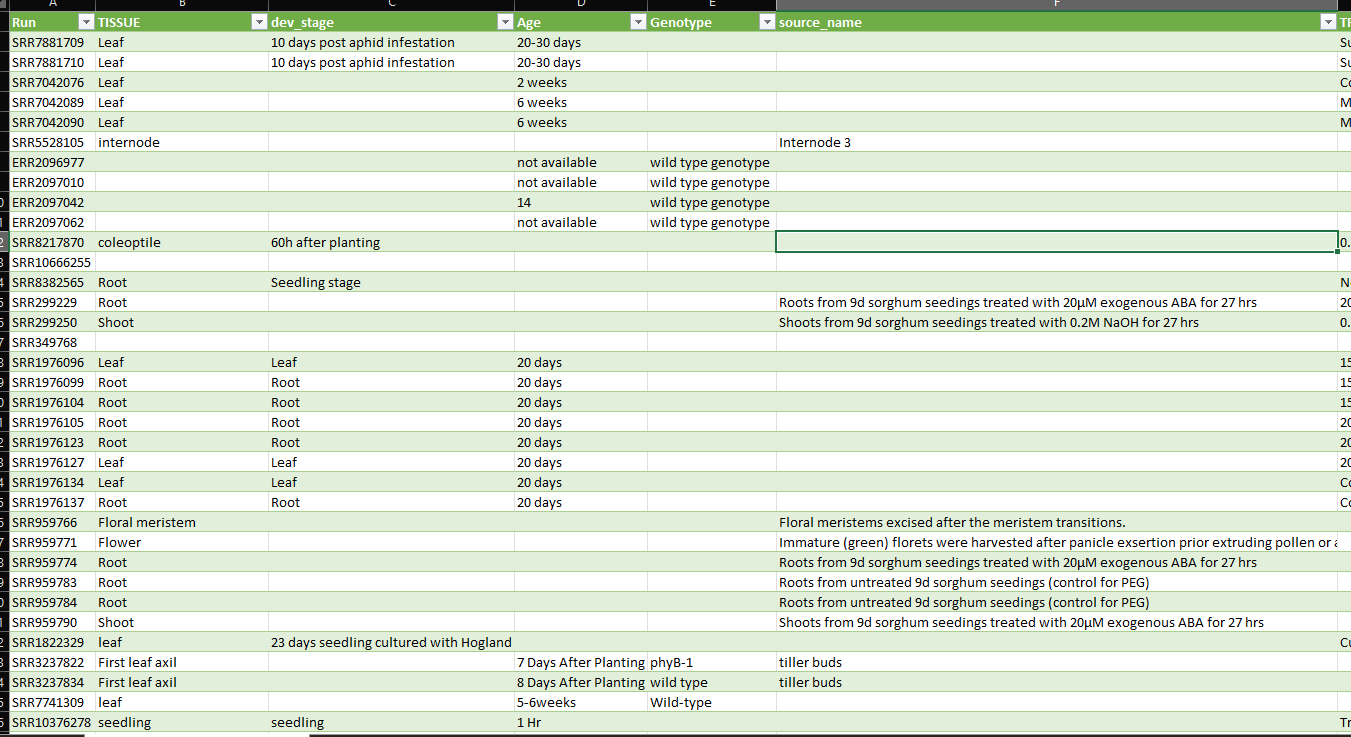

In the first column, you see the ID of the RNA-seq sample, and in further columns you will see other info. You are looking for the info containing the description of the samples. As you can see, the information is often scattered, without consistency or even sometimes missing. This is because the different groups submitting the data to a repository are often not following guidelines, or are outright lazy. 

To make use of the data, we have to annotate the samples in a consistent manner. This is where you come in. 
Your task is to go over each row in the table and produce 'sample_annotation.txt' file for your species. More specifically, you have to match the fuzzy annotations in runinfo to the Plant Ontology (PO) annotations, found in **PlantOntologyStudents.txt** file. PO provides a structured vocabulary describing plant anatomy (you can read more here: https://www.ebi.ac.uk/ols/ontologies/po).

To make the annotation, study the runinfo file, understand the anatomy of your organism and what the different PO terms represent.

For example, the annotations of the first few samples above should be:





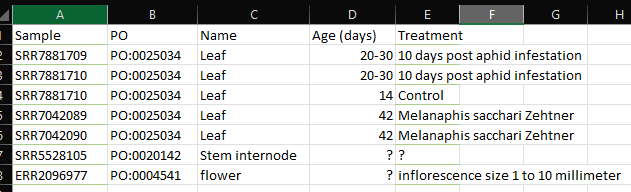

##Task 1 - Annotate the RNA-seq experiments

There should be ~500 samples in your runinfo, and you need them by week 12, so you have three weeks to get it done. Divide the annotations fairly among your group and grind through the table. 

The file resulting file should contain 5 columns:
1. The RNA-seq sample ID, that **must also be found in the expression matrix**
2. The PO term
3. PO term description, from the PlantOntologyStudents.txt file
4. Age of the plant
5. Any additional info that you found, e.g., age, treatment, mutation.

Save the result as X_sample_annotation.txt where X is your group ID. Send the file to Marek together with your final report. Note: do not use programming to solve this... Only humans can reliably do the annotation (for now).

# Week 10 - Identifying the most co-expressed photosynthesis gene

**Prerequisites**: Working knowledge of strings, lists, loops, dictionaries and reading/writing files.

**Tasks**: You have three tasks this week. 
1. Retrieve all genes involved in photosynthesis. 
2. Construct a co-expression network that shows which of these genes have similar expression profiles.
3. Identify a gene with the most connections (i.e., most co-expressed to) to the other photosynthesis genes.

It is time to check whether your expression matrix can be used to predict gene function. This is called a '[sanity check](https://en.wikipedia.org/wiki/Sanity_check)', where you check whether your script and data can produce an **expected outcome**. After analyzing co-expression networks from tens of different organisms, you will realize that in all of them the photosynthesis genes are co-expressed. If they are not, then something is clearly wrong, and two possibilities exist:

1. You have made an error in your network-generating script
2. The gene expression data for your organism is of poor quality. Consult the instructor. 


##Task 1 - Retrieve all genes involved in photosynthesis.

To retrieve all genes involved in photosynthesis, open the _mapman.txt file of your species to view MapMan ontology annotations. 

Which MapMan bin represents photosynthesis? Which genes are involved in photosynthesis? 

Now, write a script to parse the mapman file and add all photosynthesis-related genes to the genes_of_interest list.

First, mount your google drive and find the path to your files in the 'Files' menu on the right.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

How to read data in **mapman.txt**

*   each row corresponds to a specific gene
*   each column contains BINCODE, NAME, IDENTIFIER, DESCRIPTION, TYPE of gene in sequence respectively
*   only >5 numbered BINCODE _._._._._ starts identifying genes, others are just subsections
*   only 1._._._._ BINCODEs correspond to photosynthesis related genes (2:cellular respiration, 3:carbohydrate metabolism etc.)
*   When reading, each row becomes a continuous string eg. column headers: 'BINCODE\tNAME\tIDENTIFIER\tDESCRIPTION\tTYPE\n'
*   gene of interest IDENTIFIER is important part needed for expression matrix eg. gsbrna2t00150775001




Your solution should have 6-10 lines of code

In [ ]:
genes_of_interest = []
#Write your solution below
# read from mapman.txt and create list of lines where each line is row of data
f1 = open('Brassica_napus_mapman.txt','r').readlines()

# read through each row and extract rows with genes identified as related to photosynthesis 
# and BINCODE of row must be more than 9 numbers and . to exclude subheadings in file
for r in f1:
  temp = r.split('\t')
  if 'Photosynthesis' in r and len(temp[0])>=9:
    gene = temp[2].upper()
    if len(gene)!=0 and gene not in genes_of_interest: 
      genes_of_interest.append(gene) # extract/slice out identifier using index, capitalise and append to genes_of_interest list

print(len(genes_of_interest))

710


Now that you have the relevant genes, retrieve their expression profiles from the expression matrix. To this end, use a dictionary called id_to_exp = {}. Keys should be gene IDs (string), while values should be gene expression values (float). For example, the dictionary should look like:

id_to_exp = {'geneA':[4.7,2.2,5.4,6.8], 'geneB':[1.1, 2.5, 5.4, 6.1]}

Your solution should have 6-10 lines of code

How to read data in **expression matrix** 
 

*   each row contains expression values corresponding to a specific gene GSBRNA2####
*   each column contains expression values corresponding to a specific RNA seq sample

*   When reading, each row becomes a continuous string eg. column headers: 'genes\tSRR12364375\tSRR5802456\t...'









In [ ]:
id_to_exp = {}
#Write your solution below 
# read from expression matrix and create list of lines where each line is row of data
f2 = open('Brassica_napus-3708_1.txt','r').readlines() 

#read through each row and extract rows corresponding to gene of interest as individual lists
for r in f2:
  temp2 = r.split('\t')
  if temp2[0] in genes_of_interest: #extract relevant rows  
    ev = [float(i) for i in temp2[1:]] #convert expression values to float
    id_to_exp[r[0:19]] = ev #create dictionary


In [ ]:
#to check

print(len(id_to_exp))

##Task 2 - Construct a co-expression network of the photosynthetic genes

Now that you have a list and expression of relevant genes, it is time to construct a co-expression network. To this end, you need to compare all possible pairs of genes and decide which of these pairs have similar expression profiles. To achieve this, you should use [Pearson Correlation Coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) (PCC, also denoted by r), which can be used to calculate the similarities between two vectors (lists) of numbers, such as gene expression values. R ranges from -1 (two genes are perfectly anti-correlated), through 0 (two genes are not correlated) to 1 (two genes are perfrectly correlated). Thus, genes with r value close to 1 are correlated, indicating that they are co-expressed. 

In [ ]:
from scipy import stats #imports the stats module that contains many statistical methods

#Example 1.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [10, 20, 30, 40, 50]) #two expression vectors are perfectly correlated
print('The first r-value is ', r)

#Example 2.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [10, 50, 20, 40, 30]) #two exoression vectors are poorly correlated
print('The second r-value is ', r)

#Example 2.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [5, 4, 3, 2, 1]) #twi exoression vectors are perfectly anti-correlated
print('The third r-value is ', r)

To construct the co-expression network, calculate r between **all possible pairs of genes**, and use high cut-off (e.g., r>0.9, r>0.8 or r>0.7) to indicate which pairs of genes are co-expressed. Add the pairs of co-expressed genes to network list. For example, if genes a and b, and genes b and c are co-expressed, your list should look like:

network = [['a','b'],['b','c']]

Adjust r cut-off to obtain ~100 pairs of co-expressed genes. Do the number of pairs increase or decrease when you increase r cut-off? Why?

You might get a warning 'An input array is constant; the correlation coefficient is not defined.   warnings.warn(PearsonRConstantInputWarning())'. What does it mean and why are you getting this error?

Your solution should have 6-10 lines of code

In [ ]:
from scipy import stats
import numpy as np

network = []
count = 0
genes = list(id_to_exp.keys()) 

#form pairs in the following manner: (a,b) > (a,c) > (a,d) | (b,c) > (b,d)
#there will be no repetition of fairs like (a,b) or (b,a)
#for every gene in the id dictionary, fix it in a pair (gene1, __) 
for i in range(len(genes)): 
  for j in range(i+1,len(genes)): #use loop to pair ^^ with every other gene after it 
    gene1, gene2 = genes[i], genes[j]
    expr1, expr2 = id_to_exp[gene1], id_to_exp[gene2]
    r, p = stats.pearsonr(expr1,expr2)
    if 0.8 < r < 1: #r-values range that is high enough to identify highly correlated genes
      network.append((gene1, gene2))



NameError: ignored

In [ ]:
# to check

print(network)

To visualize your co-expression network, run the cell below. An interactive network should appear.

In [ ]:
#@markdown Run this cell to visualize the network. If you change the network, rerun this cell. 


import IPython
from IPython.display import display, HTML

def style_one_node(GeneID, shape, color):
  '''Returns the string of html css style sheet to be added to the index html file'''
  node_styling='''\
              {
              selector: 'node[id="GENEID"]',
              style: {
                  shape: 'ENTER_SHAPE',
                  'background-color': 'ENTER_COLOR',
                  }
              },
  '''
  node_styling = node_styling.replace('GENEID', GeneID)
  node_styling = node_styling.replace('ENTER_SHAPE', shape)
  node_styling = node_styling.replace('ENTER_COLOR', color)

  return node_styling

def generate_html_index(list_of_edges):
  '''Returns a string of a html with javascript code to render the network from list_of_nodes and list_of_edges. list_of_nodes = ['a','b','c'], list_of_edges = [['a','b'],['b','c']]'''
  front_html = '''\
  <!doctype html>
  <html>
    <head>
        <title>Network on Cytoscape</title>
        <script src='https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.9.4/cytoscape.min.js'></script>
    </head>

    <style>
        #cy {
            width: 1000px;
            height: 950px;
            }
    </style>

    <body style="background-color:rgb(194, 229, 243);">
      <div><p>Click to download as: <br><a id="pngimage" href="#" download="NetworkImage.png">Image</a> | <a id="cyjson" href="#" download="NetworkImage.json">JSON</a></p></div>
      <div id="cy"></div>
      <script>
        var cy = cytoscape({
          container: document.getElementById('cy'),
  '''


  mid_html = '''\
          elements: {
              nodes: [\n
  '''

  list_of_nodes = []
  for i in list_of_edges:
      list_of_nodes +=i
  list_of_nodes = list(set(list_of_nodes)) 

  #get nodes
  # { data: { id: 'a', node_type: 'q/t', color: 'x', shape: 'z' } },
  for j in list_of_nodes:
      shape, color = "triangle", "Silver"
      ntype = "linked"
      new_node = "\t"*5 + "{\n" + "\t"*6 + "data: {\n" +\
        "\t"*6 + "id: \'" + j + "\',\n" +\
        "\t"*6 + "node_type: \'" + ntype + "\',\n" +\
        "\t"*6 + "color: \'" + color + "\',\n" +\
        "\t"*6 + "shape: \'" + shape + "\'\n" + "\t"*6 + "}\n" + "\t"*5 + "}"
      if list_of_nodes.index(j) != len(list_of_nodes)-1:
        new_node += ",\n"
      else:
        new_node += "\n\t\t\t\t],\n"
      mid_html += new_node

  mid2_html = '''\
              edges: [\n
  '''
  mid_html += mid2_html
  #get edges
  for i in range(len(list_of_edges)):
    ID = list_of_edges[i][0] + " | " + list_of_edges[i][1]
    source = list_of_edges[i][0]
    target = list_of_edges[i][1]
    new_edge = "\t"*5 + "{\n" + "\t"*6 + "data: {\n" +\
      "\t"*7 + "id: \'" + ID + "\',\n" +\
      "\t"*7 + "source: \'" + source + "\',\n" +\
      "\t"*7 + "target: \'" + target + "\'\n" + "\t"*6 + "}\n" + "\t"*5 + "}"
    if i != (len(list_of_edges)-1):
      new_edge += ",\n"
    else:
      new_edge = new_edge + "\n\t\t\t\t]\n"
    mid_html += new_edge

  back_html = '''\
            },
            style: [
              { 
              selector: "node",
              style: {
                  shape: 'data(shape)',
                  'height': '3px',
                  'width': '3px',
                  'background-color': 'data(color)',
                  label: 'data(id)',
                  'border-style':'solid',
                  'border-color':'black',
                  'border-width':'0.1px',
                  'font-size': 1.2,
                  'text-margin-y':'-0.4px',
                  'text-outline-color':'white',
                  'text-outline-width':'0.15px',
                  'text-outline-opacity':0.8
                  }
              },
              {
              selector: 'edge',
              style: {
                  'width': '0.1px',
                  'line-style':'solid',
                  'line-fill':'solid',
                  'background-color': '#F5F5F5',
                  'opacity':0.4
                  }
              },
              {
              selector:'core',
              style: {
                  'outside-texture-bg-color':'white',
                  'outside-texture-bg-opacity':1
                  }
              },
            ],
            layout: {
              name: 'cose',
              animateThreshold: 1,
              nodeOverlap: 100,
              gravity: 400,
              componentSpacing: 100,
              edgeElasticity: 100,
              minTemp: 1,
              initialTemp: 1000,
              stop: function() {
                  //generate PNG image to display from "id = pngimage"
                  var png64 = cy.png({bg:'white'});
                  document.getElementById('pngimage').setAttribute('href', png64);
                  //generate JSON to download for id = cyjson
                  var jsonc = JSON.stringify(cy.json(), null, "\\t");
                  document.getElementById('cyjson').setAttribute('href', 'data:text/plain;charset=utf-8,' + encodeURIComponent(jsonc));
              }
            }
        });

      </script>
    </body>
  </html>
  '''

  index_html = front_html + mid_html + back_html
  return index_html

def save_index_file(index_html, guide_gene):
  '''Writes the html/js string into a html file and return the path to the new html file'''
  network_html_path = "Network_index_" + guide_gene + '.html'
  with open(network_html_path, 'w+') as index_file:
    index_file.write(index_html)
  print("HTML file saved in: " + network_html_path+ "\n")
  return network_html_path

##Run this cell to see an example of the network. Do not alter this code.
network_z = generate_html_index(network)
index_html = network_z.replace('NetworkImage', 'Genes') #Specify Name of png file to be downloaded based on guide gene
network_html_path = save_index_file(index_html, 'Genes')
IPython.display.HTML(filename = network_html_path)

## Task 3: Which gene is mostly co-expressed with the other genes? 

Now that you have the network, you can identify a gene that has the highest number of connections to other genes. Genes with high node degree (number of connections) are often playing a central role in a given biological process. Thus, by identifying this gene, you will likely identify the most important component of photosynthesis.

Write a script that takes the network file (in form of [['a','c'], ['a','b'],['a','d']]), and returns the ID of the most highly connected gene (in this example 'a'). In case of a tie, take the first most highly connected gene that you found. Write down the ID of the gene, as you will need it next week.

Note down the ID of this gene, as you will need it next week.

Your solution should have ~20 lines of code

In [ ]:
# Create a dictionary to count the number of connections for each gene
counts = {g: 0 for g in genes}

for pair in network: # a pair = (gene0,gene1) where gene0 = "GSBRNA..." = g keys added into counts dictionary
    counts[pair[0]] += 1
    counts[pair[1]] += 1

# Find the most highly connected gene
# max(counts) alone will return the key that has the highest value based on its letters
# adding key= argument will ensure the max() compares the values held in the key instead
most_connected = max(counts, key=counts.get)

print("The most highly connected gene is ",most_connected)


#Week 11 - Identify novel components of photosystem

**Prerequisites**: You have constructed a co-expression network and identified a gene with the highest node degree. You should have a working knowledge of strings, lists, dictionaries and reading files.

You have two tasks this week:
1. Identify **top 50 genes** co-expressed with the gene that you found last week. Use R value to identify the top 50 genes.
2. Discuss the function of the **top 50 genes** found in the above list. What do they do, and does their function fit with photosynthesis?



In [ ]:
#Mount Google Drive
from scipy import stats
from google.colab import drive
import os
drive.mount('/content/gdrive')

##Task 1: Identify genes co-expressed with your query gene
First, you need to retrieve gene annotations (descriptions) from the mapman file. Open the file in Excel and decide on how to extract functional information from the file. Then, create a gene_to_anno dictionary, which should look like:

gene_to_anno = {'geneA':'protein kinase','geneB':'ribosomal protein'}

Your solution should have ~5-10 lines of code

In [ ]:
#Write your solution below.
gene_to_anno = {}

# read from mapman.txt and create list of lines where each line is row of data
gene_data = open('Brassica_napus_mapman.txt','r').readlines()

# read through each row and extract rows with genes identified as related to photosynthesis 
for r in gene_data:
  temp = r.split('\t')
  gene_name = temp[2].upper() #for each line, get gene name
  annotation = temp[3].capitalize() #then, get annotation for respective gene
  gene_to_anno[gene_name] = annotation #create gene-annotation dictionary


In [ ]:
# checking
print(len(gene_to_anno))

Now that you have the annotations, load in the gene expression matrix. Then, calculate the r value between the most_connected gene and **all genes in the genome**. Finally, display the top 50 genes that are most co-expressed with the most_connected gene. 

The output should look something like this:

R | Gene ID | Description
--- | --- | ---
1 | most_connected | Photosystem gene X
0.95 | ? | ?
0.94 | ? | ?
0.87 | ? | ?
0.85 | ? | ?
0.82 | ? | ?
... | ... | ...

Expect ~15-30 lines of code

In [ ]:
#'with' statement ensures that the file is automatically closed when the block is exited
#creates a file object 'f'
with open('Brassica_napus-3708_1.txt','r') as f: 
  expressionmatrix = [line.split('\t') for line in f.readlines()] 
  #split lines and reads all from the file object, creates a list of lists 
  #outer list: diff genes, inner list: genes w/ their expression values etc
  gene_to_ev = {gene[0].upper():[float(i) for i in gene[1:]] for gene in expressionmatrix[1:]}
  #creates a dictionary, where key is gene name and value is a list of expression values
  #expressionmatrix -> outer list, gene -> inner list

from scipy import stats
import math

gene_of_interest = 'GSBRNA2T00145627001' #id from Week 10
expr1 = gene_to_ev[gene_of_interest] #since comparing w/ GOI, standardise expression value of GOI
coexpressionlst = [] #mainlst

for g in gene_to_ev: #comparing each gene's exp value w/ that of GOI's and calculating R value
  expr2 = gene_to_ev[g]
  r, p = stats.pearsonr(expr1,expr2)

  if math.isnan(r): #those with 000000000
    r = -1.0

  if g in gene_to_anno: #add description of genes
    description = gene_to_anno[g] 
  else: #there are genes in expression matrix not found in mapman
    description = 'unknown'

  temp = (r, g, description) 
  coexpressionlst.append(temp)

In [ ]:
#sort coexpression list so as to get top 50
sortedlst = sorted(coexpressionlst, reverse=True)

title = 'R\tGene ID\tDescription' #headings for the list using '/t' function
print(title)
for item in sortedlst[:51]: #seiving out top 50 correlated genes
  print('\t'.join(str(i) for i in item))

TAs: the list should contain various components of photosystem, primary metabolism or other chloroplast-related genes.
There are going to be some genes annotated as 'no hits'. These represent novel proteins which are perhaps undiscovered components of photosystems. Exciting!

##Task 2: Analyzing the list
Are the genes above involved in photosynthesis? What is the function of some of the unexpected genes? Can you explain their presence in your list? Discuss this in the final report!

#Week 12 - Plotting expression profile of your photosynthetic gene
An expression profile of a gene can tell you a great deal about it's function. Plotting in Python can be easy, but we have not covered it during the class. However, you can use the code below to make a plot with Seaborn package. Seaborn (https://seaborn.pydata.org/examples/index.html) is a python package that provides many fancy ways to visualize the data.

You will use barplots to indicate the average expression of your gene in the different organs, and use standard deviation to indicate the spread of the data. 

The example below plots the expression profile of an imaginary gene with nine expression values: 3 in leaves, 3 in roots and 3 in seeds. 


<ipython-input-3-60c9043c34b5>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval


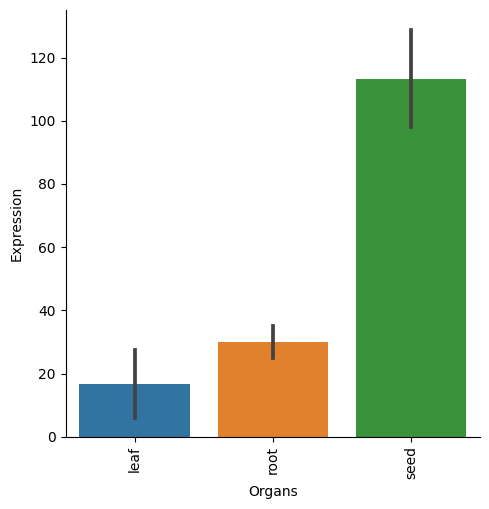

In [ ]:
import pandas as pd
import seaborn as sns

expression = [10,11,29,30,35,25, 100,110,130] #expression vector
organs = ['leaf','leaf','leaf','root','root','root','seed','seed','seed'] #annotation list

df = pd.DataFrame({'Expression':expression, 'Organs':organs}) #The data is entered into a dataframe (google what it is if you are interested)

g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval
g.set_xticklabels(rotation=90)

Using the annotations that you have generated during the first week, retrieve the sample annotations and their corresponding expression values of your gene. Then, like in the example above, plot the values.

How is your gene expressed? Does the expression profile make sense from a biological point of view? 

Expect to write ~30-40 lines of code

In [ ]:
RNA_to_ev = {}
with open('Brassica_napus-3708_1.txt','r') as f:
  ematrix = [line.strip().split('\t') for line in f.readlines()]
  for gene in ematrix:
    if gene[0] == 'GSBRNA2T00145627001':
        for i in range(len(gene[1:])):
            RNA = ematrix[0][i+1]
            if float(gene[i+1]) > 0:
                ev = float(gene[i+1])
                RNA_to_ev[RNA] = ev
            else:
                continue

organs = []
expression = []
with open('26_sample_annotation.txt', 'r', encoding='ISO-8859-1') as f:
    for line in f:
      fields = line.strip().split('\t')
      if fields[0] in RNA_to_ev:
        if len(fields)>2:
            if not fields[2]:
                organs.append('unknown')
            else:
              if 'root' in fields[2]:
                organs.append('root system')
              elif 'shoot' in fields[2]:
                organs.append('shoot system')
              elif 'seed' in fields[2]:
                organs.append('seed')
              elif 'stem' in fields[2]:
                organs.append('stem')
              elif 'silique' in fields[2]:
                organs.append('silique')
              else:
                organs.append(fields[2].strip())
            expression.append(RNA_to_ev[fields[0]])


[177.401, 449.004, 1949.59, 1708.62, 1198.76, 2287.62, 695.698, 198.698, 240.705, 4.00155, 7.57975, 989.744, 964.863, 389.446, 251.696, 5465.94, 387.714, 2638.35, 3442.16, 4329.97, 5.50072, 622.196, 296.939, 225.209, 274.732, 126.748, 180.266, 0.493331, 0.113779, 306.589, 1635.31, 2037.51, 2587.87, 1831.32, 308.377, 119.616, 137.741, 169.198, 3873.65, 6220.02, 5474.07, 3700.84, 3360.93, 831.587, 2031.52, 944.736, 5959.89, 448.062, 3409.34, 227.748, 332.701, 200.748, 207.192, 895.389, 2469.11, 1440.09, 770.108, 674.007, 952.732, 544.328, 911.513, 816.764, 1467.31, 951.034, 3068.5, 853.144, 1879.78, 823.879, 881.343, 970.389, 5594.92, 6428.81, 96.7181, 4680.44, 4728.57, 4727.6, 2913.96, 123.015, 6266.7, 6452.82, 6438.59, 6350.52, 3829.03, 6442.5, 6575.88, 7196.41, 6793.21, 7431.71, 177.083, 5776.6, 3984.68, 2312.45, 2168.91, 2608.75, 2434.27, 2445.18, 2272.34, 359.043, 247.125, 22.1129, 54.8768, 81.5956, 137.047, 48.4096, 78.3116, 185.892, 128.839, 151.266, 269.382, 141.816, 276.795, 514

In [ ]:
# to check
print(expression)
print(organs)

<ipython-input-5-041517c076c6>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval


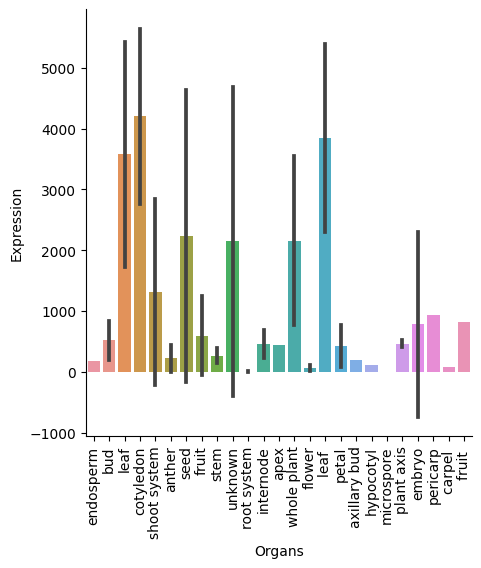

In [ ]:
from pandas.io.formats.style import StylerRenderer
import pandas as pd
import seaborn as sns
#Plug in your data into the seaborn
df = pd.DataFrame({'Expression':expression, 'Organs':organs}) #The data is entered into a dataframe (google what it is if you are interested)

g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval
g.set_xticklabels(rotation=90)

#Week 13 - Project report

The end!
Now, write a short report discussing the project. There are 5 chapters.

Please write the report within this colab notebook and submit it to Marek. Please strictly follow the guidelines of the word limit. Penalties will be given for too short or too long reports.

**Description of your species** (~250 words)
* Evolutionary relationships (is it a monocot, eudicot, what are the relatives?)
* Uses (what is this plant used for?)
* Genome size, number of genes, ploidy (google this info)
* Anatomy (what kind of organs does it have?)

**Network analysis** (~250 words)
* How many genes did you identify from the mapman annotation? What major components of the photosystem did you identify and what is the function of these components?
* What was your strategy to identify the most connected gene?

**Co-expression list analysis** (~250 words)
* What are the functions of the top 50 co-expressed genes? 
* Does this fit with their role in photosynthesis?
* Did you find anything unexpected?

**Expression profile analysis** (~125 words)
* Expression plot interpretation. How is your gene expressed and how do you interpret this expression in terms of photosynthesis?

**Conclusion** (~125 words)
* Summarize the outcomes and impressions from the project


**Send your X_sample_annotation.txt file to Marek, where X is your group number!!!**

**Description of our species**

Brassica napus, also known as "rapeseed", belongs to the Brassicaceae family. The Brassicaceae family is a family of crucifers and mustards, consisting of approximately 372 genera and 4060 species. Within this family, Brassica napus relate closely to crops like Brassica rapa (chinese cabbage, chinese mustard), Brassica oleraceae (broccoli, kale), Brassica nigra (black mustard), and Brassica juncea (indian mustard).*(5)*  Brassica napus is an amphidiploid with 38 chromosomes, formed from the hybridisation of B. oleracea L. and B. rapa.*(5,7)*  It has an approximate sequenced genome size of 921.1 Mb, as discovered by Chen X., et.al  in 2020.

Brassica napus are primarily used for human and animal consumption. They are used in the manufacturing of vegetable oil for food production and also act as a high-protein meal for cattle, poultry, swine and fish. Additionally, it has non-edible industrial purposes to produce biodiesel, lubricant, and plastic. 

Brassica napus is a dicot*(2)* with hairy, freely-branched stems up to 1.5m long, bluish-green leaves, and pale yellow racemes. Each flower contains 4 sepals, 4 diagonally opposite obovate-shaped petals that enclose 4 long and 2 short stamens, and a central ovary.*(2)* After fertilization, linear cylindrical siliques are produced, each containing 15 or more seeds arranged singly in a row that start off translucent, then turn green, and finally reddish-brown. During germination, seedlings emerge from between the two conduplicate cotyledons. Bolting, stem extension, branching and upper leaf formation occur as the plant grows.*(5)* 

**Network analysis**

A total of 710 genes involved in photosynthesis were identified from the Brassica napus mapman annotation. 

Out of the 60 components of the Brassica napus photosystem, we defined the major components as those that appear more than 30 times in the mapman. 



*LHC-II complex	T* --> Responsible for light absorption and excitation energy transfer in light-limiting conditions and photoprotection in high-light conditions

*PS-II complex  T* --> A multi-component pigment-protein complex responsible for water splitting, oxygen evolution, and plastoquinone reduction

*PS-I complex* --> The largest known multisubunit membrane protein complex that functions as a solar energy converter. It catalyzes the transfer of an electron from plastocyanin or cytochrome c6 on the lumenal side of the cell to ferredoxin (or flavodoxin) on the cytoplasmic side.*(4)*

*Protein involved in PS-I assembly* --> Photosystem I is found within the thylakoid membrane of plants. It contains the necessary photosynthetic pigments that absorb light energy to carry out the first light-dependent reaction of photosynthesis. Its assembly and maintenance are regulated by several protein factors that ensure proper protein folding, stabilization, and integration of subunits.*(6)*



We constructed a co-expression network to compare all possible pairs of genes and decide which of these pairs have similar expression profiles. The Pearson Correlation Coefficient (denoted by ‘r’) was utilised to calculate the similarities between two possible pairs of genes. 
We narrowed down 100 pairs of co-expressed genes by adjusting the r cut-off to >0.8 and <1, creating a dictionary to count the number of connections each gene has within the network list. Using the max function, we identified the gene with the highest number of connections to be the most connected gene -- GSBRNA2T00145627001. 




**Co-expression list analysis**

The functions of the top 50 genes include encoding for protein components of the light-harvesting complex 1 and 2, a protein component of photosystem 1, membrane extrinsic subunit of photosystem 2 oxygen-evolving center, Co-factor of plastid-encoded RNA polymerase(tac 16), calcium sensor(cas), beta-galactosidase (bgal), Chlorophyll a-b binding protein 3(LHCB), Protein s-acyltransferase (pat1-9), Catalytic component crd1 of mg-protoporphyrin ix monomethyl ester cyclase complex, Phosphoribulokinase (prk), Plastocyanin electron carrier, Protein involved in ps-ii repair (ppl1), Plastidial glutamine synthetase (gln2), Fructose-1,6-bisphosphatase, Protein involved in ps-ii assembly (psb32), Regulatory protein lipocalin (lcnp) of non-photochemical quenching, Phosphopentose epimerase, Glyceraldehyde 3-phosphate dehydrogenase (gapdh), Probable plastid-lipid-associated protein 8, Chlorophyll dephytylase (cld). 

This fits in their role in photosynthesis as many of the top 50 genes express protein components involved in the light-harvesting complexes and the photosystem 1 and 2 structure. Additionally, many genes such as LHCB are essential in harvesting light and transferring excitation energy to the reaction center, while others express genes that regulate the plant in the process of photosynthesis like gln2 and some genes are required in the Calvin cycle of photosynthesis such as Phosphoribulokinase and Fructose-1,6-bisphosphate. Most of the genes that we found are useful in the role of photosynthesis and we did not find anything that was unexpected.

**Expression profile analysis**

Our gene of interest (GSBRNA2T0014562700) is expressed in many plant parts. From the expression plot, we inferred that it is majorly expressed in the cotyledon and leaf. It was most expressed in the cotyledon with an expression value of approximately 4200. The cotyledon stores nutrients and performs photosynthesis for developing plants without leaves, providing most of the necessary matter required for seedling growth and development.*(8)* Our gene is also highly expressed in the leaf, whose cells and structure are specialized to absorb light for photosynthesis.*(1)*

This suggests that GSBRNA2T0014562700 is vital throughout the Brassica napus’ lifespan. It is crucial for early development, and obtaining food for the adult plant.

On the other hand, GSBRNA2T0014562700 is expressed lowly in the flower, carpel, hypocotyl and least expressed in the root system. 


**Conclusion**

There are a total of 710 genes involved in the photosynthesis of Brassica napus, and of these 710, we have identified gene GSBRNA2T0014562700 as a novel synthetic gene in the Brassica napus, due to its relatively high expression in the plant.

The photosynthetic property of GSBRNA2T0014562700 and the other closely related 49 genes can be further explored in future studies, to give insights into how crop yield can be improved. This can help in combating food shortages and alleviating malnutrition by making the plant more nutritious.


**Bibliography**

1. Body, V. (n.d.). Leaf structures involved in photosynthesis. https://www.visiblebody.com/learn/biology/photosynthesis/leaf-structures 

2. Brassica napus. (n.d.). http://www.southeasternflora.com/view_flora.php?plantid=2142

3. Chen, X., Tong, C., Zhang, X., Song, A., Hu, M., Dong, W., Chen, F., Wang, Y., Tu, J., Liu, S., Tang, H., & Zhang, L. (2021). A high‐quality Brassica napus genome reveals expansion of transposable elements, subgenome evolution and disease resistance. Plant Biotechnology Journal, 19(3), 615–630. https://doi.org/10.1111/pbi.13493 

4. El-Mohsnawy, E., Kopczak, M. J., Schlodder, E., Nowaczyk, M., Meyer, H. E., Warscheid, B., Karapetyan, N. V., & Rögner, M. (2010). Structure and function of intact photosystem 1 monomers from the cyanobacterium thermosynechococcus elongatus ,. Biochemistry, 49(23), 4740–4751. https://doi.org/10.1021/bi901807p 

5. Government of Canada. (2017). The Biology of Brassica napus L. (Canola/Rapeseed). (Biology Document BIO2017-03). https://inspection.canada.ca/plant-varieties/plants-with-novel-traits/applicants/directive-94-08/biology-documents/brassica-napus-l-/eng/1330729090093/1330729278970 

6. Jensen, P. E., Bassi, R., Boekema, E. J., Dekker, J. P., Jansson, S., Leister, D., Robinson, C., & Scheller, H. V. (2007). Structure, function and regulation of plant photosystem I. Biochimica Et Biophysica Acta, 1767(5), 335–352. https://doi.org/10.1016/j.bbabio.2007.03.004 

7. Lee, H., Chawla, H. S., Obermeier, C., Dreyer, F., Abbadi, A., & Snowdon, R. (2020). Chromosome-scale assembly of winter oilseed rape brassica napus. Frontiers in Plant Science, 11. https://www.frontiersin.org/articles/10.3389/fpls.2020.00496 

8. Shi, Y., Chen, J., & Hou, X. (2020). Similarities and differences of photosynthesis establishment related mrnas and novel lncrnas in early seedlings (Coleoptile/cotyledon vs. True leaf) of rice and arabidopsis. Frontiers in Genetics, 11. https://www.frontiersin.org/articles/10.3389/fgene.2020.565006 